# Laboratorio 2

## Desarrollo de una herramienta anal√≠tica usando paquetes especializados para an√°lisis de datos en Python

Para el desarrollo de esta actividad puedes utilizar cualquier librer√≠a externa. Te recomendamos leer por completo el enunciado del laboratorio antes de comenzar, de forma que tengas claro el prop√≥sito global de la actividad y puedas desarrollar tu soluci√≥n apuntando a √©l desde el inicio.

Al desarrollar este laboratorio pondr√°s a prueba tus habilidades para:

1. Identificar y abordar preguntas de negocio y de *analytics*.
2. Leer datos desde archivos y almacenarlos utilizando m√©todos de librer√≠as especializadas.
3. Explorar, modificar, limpiar y unir objetos tablas de datos.
4. Implementar an√°lisis combinando m√©tricas descriptivas, visualizaci√≥n, filtrado y agrupaci√≥n.
5. Implementar an√°lisis basado en modelos estad√≠sticos o de *machine learning*.

##  Contexto: desigualdad y factores de √©xito en pruebas Saber 11 en Colombia

El ICFES es el Instituto Colombiano para el Fomento de la Educaci√≥n Superior y est√° adscrito al Ministerio de Educaci√≥n a nivel nacional. Como parte de sus funciones, el ICFES administra las pruebas Saber 11, las cuales eval√∫an a todos los estudiantes del pa√≠s al final de su educaci√≥n secundaria. El examen contiene preguntas que eval√∫an una variedad de √°reas del conocimiento (ej., matem√°ticas, f√≠sica, ingl√©s, etc.) y se lleva a cabo dos veces al a√±o, ajust√°ndose a los diferentes calendarios acad√©micos que siguen las instituciones educativas. Al momento de inscribirse a las pruebas, los estudiantes diligencian un formulario que recoge informaci√≥n sociodemogr√°fica y relacionada con la instituci√≥n a la que pertenecen. El fin es obtener informaci√≥n con respecto al desempe√±o de los estudiantes en la prueba y de sus caracter√≠sticas.

Al igual que otros pa√≠ses de la regi√≥n, Colombia tiene grandes retos en t√©rminos de desigualdad, particularmente en el contexto de educaci√≥n primaria y secundaria. Por esta raz√≥n, para el Estado colombiano es muy valioso el amplio registro de datos que el ICFES genera alrededor de las pruebas Saber 11, pues con ellos se pueden generar an√°lisis sobre la calidad de la educaci√≥n en el pa√≠s y eventualmente dar lugar a recomendaciones sobre pol√≠ticas p√∫blicas. En particular, la problem√°tica a abordar en este caso de estudio es la desigualdad y factores de √©xito en las pruebas Saber 11. 

Los objetivos de este caso de estudio son:

* Entender el contenido de los archivos de datos proporcionados sobre las pruebas Saber 11, generar un reporte acerca de sus caracter√≠sticas principales y seleccionar las partes de dicho contenido que podr√≠an ser relevantes para el an√°lisis.


* Identificar caracter√≠sticas de las variables de inter√©s y relaciones entre ellas, por ejemplo, a trav√©s de agrupaci√≥n, visualizaciones y estad√≠sticas descriptivas.


* Proponer un modelo que busque relacionar las variables de inter√©s con el desempe√±o de los estudiantes y concluir acerca de los posibles hallazgos que se podr√≠an reportar para el *stakeholder*.


* Generar una herramienta que permita a un usuario interactuar con alguno de los par√°metros del an√°lisis realizado de forma relevante en el contexto del problema.

## Fase 1: obtener e inspeccionar archivos

En esta fase te har√°s una idea general del contenido de los datos y generar√°s un reporte al respecto (ej., imprimiendo mensajes, presentando tablas de resumen, etc.). Adem√°s, seleccionar√°s un segmento de los datos que consideres √∫til para realizar tu an√°lisis.

Pautas generales:

* Utilizar una librer√≠a especializada para leer los archivos de datos y agregarlos seg√∫n sea necesario (ej., utilizando los m√©todos `append` o `concat` si eliges cargarlos utilizando la librer√≠a `pandas`).
* Inspeccionar el archivo a partir de sus encabezados, columnas y descripciones de las variables seg√∫n su tipo (ej., num√©ricas, categ√≥ricas).
* Declarar una estructura de datos (ej., una lista) para almacenar un subconjunto de variables que puedan ser relevantes para la problem√°tica de inter√©s.

Preguntas gu√≠a:

* ¬øQu√© dimensiones tienen los datos?
* ¬øCon cu√°ntos a√±os y periodos de evaluaci√≥n se cuenta?
* ¬øCu√°les variables pueden ser de inter√©s para la problem√°tica planteada?
* ¬øQu√© porcentaje de datos faltantes o no v√°lidos hay en las columnas de inter√©s? ¬øQu√© planteas para manejarlos?

In [ ]:
import pandas as pd
import numpy as np

cal_a = pd.read_csv(
    './files/2020-1.csv',
    sep=',',
    quotechar='"',
    encoding='latin-1',
    low_memory=False
)
cal_b = pd.read_csv(
    './files/2020-2.csv',
    sep=',',
    quotechar='"',
    encoding='latin-1',
    low_memory=False
)

comunes = cal_a.columns.intersection(cal_b.columns)
print("‚û°Ô∏è Columnas comunes detectadas:", len(comunes))
print("Ejemplo de columnas comunes:", list(comunes)[:15], "...\n")

df = pd.concat([cal_a[comunes], cal_b[comunes]], ignore_index=True)


print("1) Dimensiones del dataset:")
print(f"   ‚Üí Conjunto unificado: {df.shape}")
print(f"   ‚Üí Calendario A (2020-1): {cal_a.shape}")
print(f"   ‚Üí Calendario B (2020-2): {cal_b.shape}\n")

print("2) A√±os y periodos de evaluaci√≥n en el conjunto de datos:")
if 'PERIODO' in comunes or 'periodo' in comunes:
    print("   ‚Üí Datos del a√±o 2020 con calendario A y B\n")
else:
    print("   ‚Üí No se encontr√≥ la columna 'PERIODO'\n")


columnas_interes = [
    'PERIODO',
    'COLE_CALENDARIO','COLE_AREA_UBICACION','COLE_BILINGUE','COLE_CARACTER','COLE_NATURALEZA',
    'COLE_DEPTO_UBICACION','COLE_MCPIO_UBICACION','COLE_JORNADA',
    'ESTU_GENERO','ESTU_ETNIA','FAMI_ESTRATOVIVIENDA',
    'PUNT_GLOBAL','PUNT_INGLES','PUNT_MATEMATICAS','PUNT_LECTURA_CRITICA',
    'PUNT_SOCIALES_CIUDADANAS','PUNT_C_NATURALES',
    'PERCENTIL_GLOBAL'
]
print("3) Variables de inter√©s consideradas:")
print(columnas_interes, "\n")

existentes = [c for c in columnas_interes if c.lower() in df.columns.str.lower()]
if existentes:
    faltantes = df[existentes].isnull().mean() * 100
    print("4) Porcentaje de datos faltantes por columna:")
    print(faltantes.sort_values(ascending=False))
else:
    print("4) Ninguna de las variables de inter√©s declaradas se encontr√≥ en el conjunto.")

‚û°Ô∏è Columnas comunes detectadas: 78
Ejemplo de columnas comunes: ['ESTU_TIPODOCUMENTO', 'ESTU_NACIONALIDAD', 'ESTU_GENERO', 'ESTU_FECHANACIMIENTO', 'PERIODO', 'ESTU_CONSECUTIVO', 'ESTU_ESTUDIANTE', 'ESTU_PAIS_RESIDE', 'ESTU_TIENEETNIA', 'ESTU_DEPTO_RESIDE', 'ESTU_COD_RESIDE_DEPTO', 'ESTU_MCPIO_RESIDE', 'ESTU_COD_RESIDE_MCPIO', 'FAMI_ESTRATOVIVIENDA', 'FAMI_PERSONASHOGAR'] ...

1) Dimensiones del dataset:
   ‚Üí Conjunto unificado: (520307, 78)
   ‚Üí Calendario A (2020-1): (15435, 78)
   ‚Üí Calendario B (2020-2): (504872, 81)

2) A√±os y periodos de evaluaci√≥n en el conjunto de datos:
   ‚Üí Datos del a√±o 2020 con calendario A y B

3) Variables de inter√©s consideradas:
['PERIODO', 'COLE_CALENDARIO', 'COLE_AREA_UBICACION', 'COLE_BILINGUE', 'COLE_CARACTER', 'COLE_NATURALEZA', 'COLE_DEPTO_UBICACION', 'COLE_MCPIO_UBICACION', 'COLE_JORNADA', 'ESTU_GENERO', 'ESTU_ETNIA', 'FAMI_ESTRATOVIVIENDA', 'PUNT_GLOBAL', 'PUNT_INGLES', 'PUNT_MATEMATICAS', 'PUNT_LECTURA_CRITICA', 'PUNT_SOCIALES_CI

## Fase 2: identificar caracter√≠sticas y relaciones en las variables

En esta fase realizar√°s an√°lisis descriptivo para identificar posibles patrones o relaciones entre las variables de inter√©s para la problem√°tica planteada. Adem√°s, expondr√°s estad√≠sticas descriptivas y visualizaciones para concluir al respecto de los patrones y las relaciones identificadas. Finalmente, elegir√°s el segmento de los datos sobre el cual profundizar√°s con tu an√°lisis (este puede ser, o no, igual al seleccionado anteriormente).

Pautas generales:

* Calcular estad√≠sticas descriptivas b√°sicas (por lo menos, media/mediana y varianza/desviaci√≥n) para cada variable sociodemogr√°fica relevante en el contexto del problema.
* Utilizar librer√≠as especializadas (ej., `matplotlib`, `seaborn`, etc.) para inspeccionar visualmente variables de inter√©s. Los m√©todos `distplot`, `pairplot`, `boxplot`, o `violinplot`, entre otros, pueden ser √∫tiles.
* Utilizar el m√©todo `groupby` de `pandas`, en conjunto con m√©todos de visualizaci√≥n, puede proveer evidencia del impacto de las variables sociodemogr√°ficas de inter√©s sobre el desempe√±o de los estudiantes en la prueba.

Preguntas gu√≠a:

* ¬øHay patrones de inter√©s en las distribuciones de las variables o en las relaciones entre ellas?
* ¬øConsideras que existe alg√∫n impacto significativo de variables sociodemogr√°ficas en los puntajes globales o por √°rea?
* ¬øSobre cu√°les variables har√≠as un an√°lisis m√°s profundo?

Variables categ√≥ricas (encontradas): ['PERIODO', 'COLE_CALENDARIO', 'ESTU_GENERO', 'FAMI_ESTRATOVIVIENDA']
Variables de puntaje (encontradas): ['PUNT_GLOBAL', 'PUNT_MATEMATICAS', 'PUNT_LECTURA_CRITICA', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_C_NATURALES']

[Descriptivos globales de puntajes]
                             count        mean  median        std  \
PUNT_C_NATURALES          520307.0   48.430775    48.0  10.644018   
PUNT_GLOBAL               520307.0  249.565962   246.0  49.568905   
PUNT_LECTURA_CRITICA      520307.0   52.368763    53.0  10.275937   
PUNT_MATEMATICAS          520307.0   51.245297    51.0  11.778498   
PUNT_SOCIALES_CIUDADANAS  520307.0   48.441270    48.0  12.086911   

                                  var  %faltantes  
PUNT_C_NATURALES           113.295121         0.0  
PUNT_GLOBAL               2457.076326         0.0  
PUNT_LECTURA_CRITICA       105.594876         0.0  
PUNT_MATEMATICAS           138.733020         0.0  
PUNT_SOCIALES_CIUDADANAS   146.09341

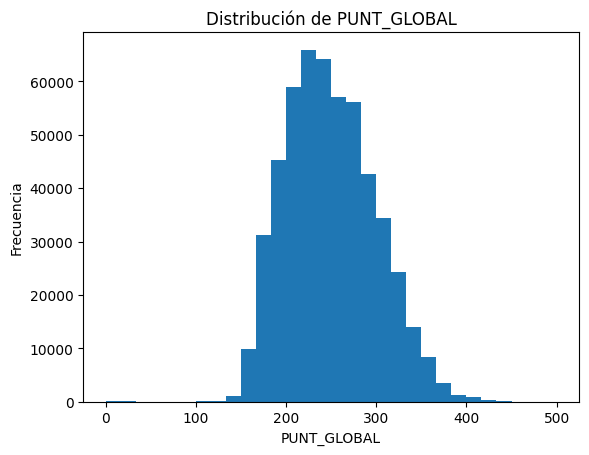

/var/folders/08/14s4v21s1hlgf09dhb1z76380000gn/T/ipykernel_81269/72852488.py:105: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=grupos[col_cal].dropna().unique())


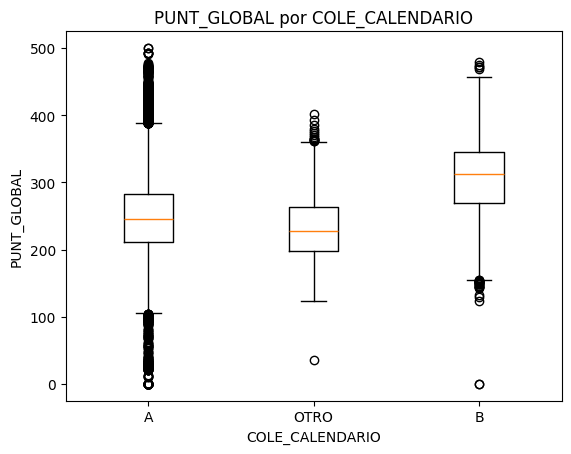

/var/folders/08/14s4v21s1hlgf09dhb1z76380000gn/T/ipykernel_81269/72852488.py:116: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=grupos[col_gen].dropna().unique())


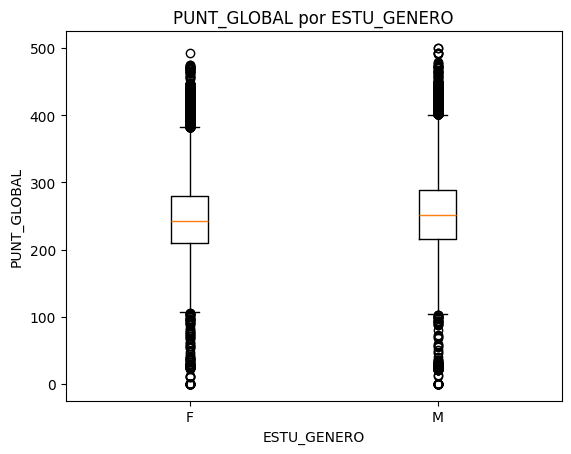

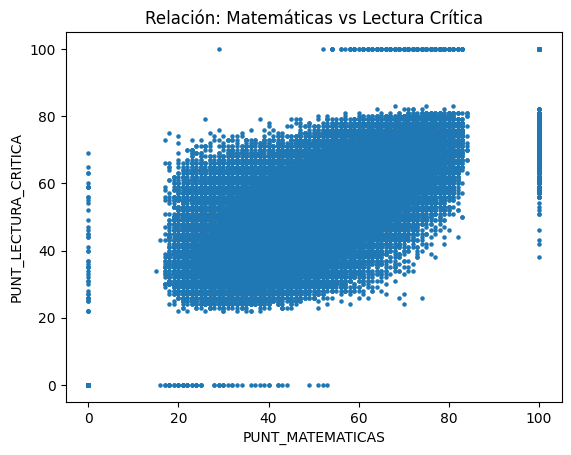

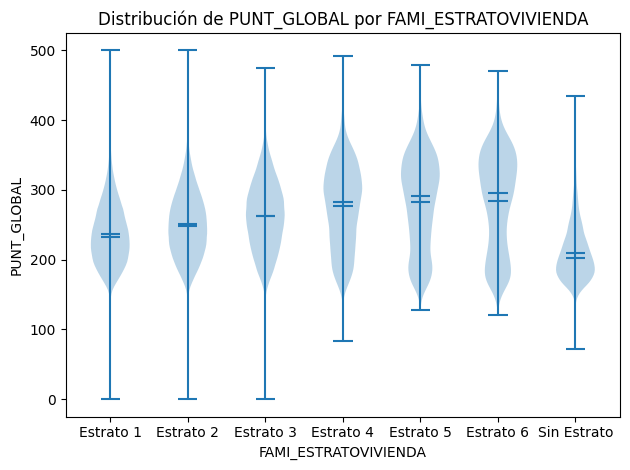

In [50]:
# Implementa tu respuesta en esta celda
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def resolver_col(df, nombre):
    m = {c.lower(): c for c in df.columns}
    return m.get(nombre.lower())

def cols_existentes(df, lista):
    out = []
    for c in lista:
        rc = resolver_col(df, c)
        if rc is not None:
            out.append(rc)
    return out

cat_candidatas = [
    'PERIODO','COLE_CALENDARIO','ESTU_GENERO','FAMI_ESTRATOVIVIENDA'
]
punt_candidatas = [
    'PUNT_GLOBAL','PUNT_MATEMATICAS','PUNT_LECTURA_CRITICA',
    'PUNT_SOCIALES_CIUDADANAS','PUNT_C_NATURALES'
]

CAT = cols_existentes(df, cat_candidatas)
PUNT = cols_existentes(df, punt_candidatas)

print("Variables categ√≥ricas (encontradas):", CAT)
print("Variables de puntaje (encontradas):", PUNT)

for c in PUNT:
    df[c] = pd.to_numeric(df[c], errors='coerce')


if PUNT:
    desc = df[PUNT].agg(['count','mean','median','std','var']).T
    desc['%faltantes'] = df[PUNT].isna().mean().values * 100
    print("\n[Descriptivos globales de puntajes]")
    print(desc.sort_index())
else:
    print("\n[Descriptivos globales de puntajes] No se encontraron columnas de puntajes.")

def resumen_por_grupo(df, col_grupo, punt_cols):
    if (col_grupo is None) or (col_grupo not in df.columns):
        return None
    tabla = df.groupby(col_grupo)[punt_cols].mean(numeric_only=True)
    tabla = tabla.sort_index()
    return tabla

col_cal = resolver_col(df, 'COLE_CALENDARIO')
tab_cal = resumen_por_grupo(df, col_cal, PUNT) if col_cal else None
if tab_cal is not None:
    print("\n[Media de puntajes por COLE_CALENDARIO]")
    print(tab_cal)

col_gen = resolver_col(df, 'ESTU_GENERO')
tab_gen = resumen_por_grupo(df, col_gen, PUNT) if col_gen else None
if tab_gen is not None:
    print("\n[Media de puntajes por ESTU_GENERO]")
    print(tab_gen)

col_est = resolver_col(df, 'FAMI_ESTRATOVIVIENDA')
tab_est = resumen_por_grupo(df, col_est, PUNT) if col_est else None
if tab_est is not None:
    print("\n[Media de puntajes por FAMI_ESTRATOVIVIENDA]")
    print(tab_est)


#  Histograma de PUNT_GLOBAL
col_pg = resolver_col(df, 'PUNT_GLOBAL')
if col_pg:
    plt.figure()
    df[col_pg].dropna().plot(kind='hist', bins=30)
    plt.title('Distribuci√≥n de PUNT_GLOBAL')
    plt.xlabel('PUNT_GLOBAL')
    plt.ylabel('Frecuencia')
    plt.show()

# 3 PUNT_GLOBAL por COLE_CALENDARIO
if col_pg and col_cal:
    plt.figure()
    grupos = df[[col_cal, col_pg]].dropna()
    # construir datos por categor√≠a
    data = [grupos.loc[grupos[col_cal]==g, col_pg].values for g in grupos[col_cal].dropna().unique()]
    plt.boxplot(data, labels=grupos[col_cal].dropna().unique())
    plt.title('PUNT_GLOBAL por COLE_CALENDARIO')
    plt.xlabel('COLE_CALENDARIO')
    plt.ylabel('PUNT_GLOBAL')
    plt.show()

# PUNT_GLOBAL por ESTU_GENERO
if col_pg and col_gen:
    plt.figure()
    grupos = df[[col_gen, col_pg]].dropna()
    data = [grupos.loc[grupos[col_gen]==g, col_pg].values for g in grupos[col_gen].dropna().unique()]
    plt.boxplot(data, labels=grupos[col_gen].dropna().unique())
    plt.title('PUNT_GLOBAL por ESTU_GENERO')
    plt.xlabel('ESTU_GENERO')
    plt.ylabel('PUNT_GLOBAL')
    plt.show()

#  PUNT_MATEMATICAS vs PUNT_LECTURA_CRITICA 
col_pm = resolver_col(df, 'PUNT_MATEMATICAS')
col_pl = resolver_col(df, 'PUNT_LECTURA_CRITICA')
if col_pm and col_pl:
    plt.figure()
    subset = df[[col_pm, col_pl]].dropna()
    plt.scatter(subset[col_pm], subset[col_pl], s=5)
    plt.title('Relaci√≥n: Matem√°ticas vs Lectura Cr√≠tica')
    plt.xlabel('PUNT_MATEMATICAS')
    plt.ylabel('PUNT_LECTURA_CRITICA')
    plt.show()

# PUNT_GLOBAL  FAMI_ESTRATOVIVIENDA 
col_pg = resolver_col(df, 'PUNT_GLOBAL')
col_est = resolver_col(df, 'FAMI_ESTRATOVIVIENDA')
if col_pg and col_est:
    import matplotlib.pyplot as plt

    plt.figure()
    tmp = df[[col_est, col_pg]].dropna()
    orden = sorted(tmp[col_est].dropna().unique(), key=lambda x: str(x))
    data = [pd.to_numeric(tmp.loc[tmp[col_est]==g, col_pg], errors='coerce').dropna().values for g in orden]
    plt.violinplot(data, showmeans=True, showextrema=True, showmedians=True)
    plt.xticks(range(1, len(orden)+1), orden, rotation=0)
    plt.title('Distribuci√≥n de PUNT_GLOBAL por FAMI_ESTRATOVIVIENDA')
    plt.xlabel('FAMI_ESTRATOVIVIENDA')
    plt.ylabel('PUNT_GLOBAL')
    plt.tight_layout()
    plt.show()

necesarias = cols_existentes(df, [
    'PUNT_GLOBAL','PUNT_MATEMATICAS','PUNT_LECTURA_CRITICA',
    'PUNT_SOCIALES_CIUDADANAS','PUNT_C_NATURALES'
])
segmento = df.copy()
if necesarias:
    segmento = segmento.dropna(subset=necesarias)
if col_cal:
    segmento = segmento[segmento[col_cal].isin(['A','B'])]



## Fase 3: abordar relaci√≥n variables-desempe√±o a trav√©s de un modelo

En esta fase propondr√°s, implementar√°s y reportar√°s el desempe√±o de uno o m√°s modelos (al menos uno predictivo) que busquen explicar las relaciones entre factores sociodemogr√°ficos y el desempe√±o en la prueba. Adem√°s, concluir√°s con respecto a la validez de al menos un modelo y los posibles hallazgos que se podr√≠an reportar para el *stakeholder*.

Pautas generales:

* Seleccionar variables y proponer modelos acordes a estas y al contexto del problema.
* Utilizar librer√≠as especializadas (ej., `statsmodels`, `sklearn`, etc.) para indagar sobre los aspectos que contribuyen al √©xito de los estudiantes. Los m√≥dulos correspondientes a regresi√≥n lineal y regresi√≥n log√≠stica pueden ser √∫tiles.
* Asegurar el cumplimiento de los supuestos y buenas pr√°cticas de cada modelo.
* Utilizar las m√©tricas de evaluaci√≥n de desempe√±o (disponibles en las librer√≠as especilizadas), para concluir sobre la validez de los modelos propuestos.

Preguntas gu√≠a:

* ¬øExiste alg√∫n sub-conjunto de variables socio-demogr√°ficas que explique razonablemente bien el desempe√±o de los estudiantes en la prueba?

üìä Resultados del modelo de regresi√≥n lineal:
R¬≤ (bondad de ajuste): 0.038
RMSE (error promedio en puntaje): 48.67


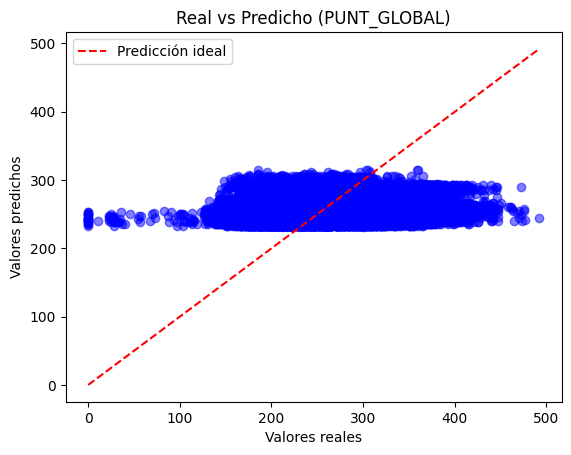

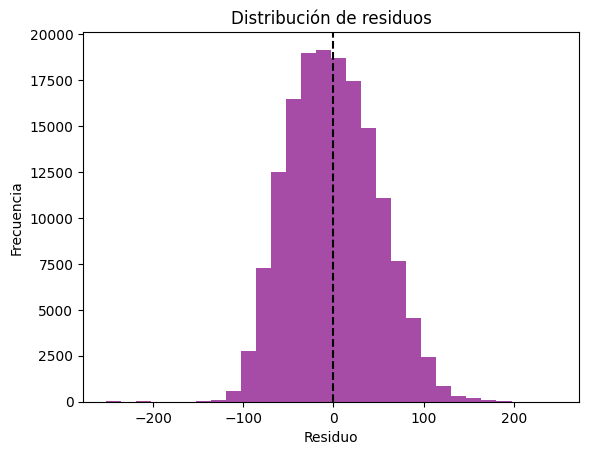

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

cols_modelo = [
    "ESTU_GENERO","FAMI_ESTRATOVIVIENDA","COLE_CALENDARIO",
    "COLE_JORNADA","PUNT_GLOBAL"
]

df_modelo = df[cols_modelo].copy()

for c in df_modelo.columns:
    if df_modelo[c].dtype == "object":
        df_modelo[c] = df_modelo[c].fillna("Desconocido")
        df_modelo[c] = df_modelo[c].astype("category").cat.codes
    else:
        df_modelo[c] = pd.to_numeric(df_modelo[c], errors="coerce")
        df_modelo[c] = df_modelo[c].fillna(df_modelo[c].median())

X = df_modelo.drop(columns=["PUNT_GLOBAL"])
y = df_modelo["PUNT_GLOBAL"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1
)

modelo = LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2   = r2_score(y_test, y_pred)

print("üìä Resultados del modelo de regresi√≥n lineal:")
print(f"R¬≤ (bondad de ajuste): {r2:.3f}")
print(f"RMSE (error promedio en puntaje): {rmse:.2f}")

plt.scatter(y_test, y_pred, alpha=0.5, color="blue")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         "r--", label="Predicci√≥n ideal")
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title("Real vs Predicho (PUNT_GLOBAL)")
plt.legend()
plt.show()

residuos = y_test - y_pred
plt.hist(residuos, bins=30, color="purple", alpha=0.7)
plt.axvline(0, color="black", linestyle="--")
plt.title("Distribuci√≥n de residuos")
plt.xlabel("Residuo")
plt.ylabel("Frecuencia")
plt.show()

## Fase 4

Deber√°s elegir y realizar una de las dos alternativas que se encuentran a continuaci√≥n.

### Alternativa 1: desarrollar una herramienta interactiva de an√°lisis

En esta fase desarrollar√°s, a partir de alguno de los an√°lisis realizados, una herramienta interactiva que sea relevante en el contexto del problema, acompa√±ada de las instrucciones necesarias para que un usuario la pueda utilizar.

Pautas generales:

* Seleccionar uno de los an√°lisis previos que pueda verse enriquecido con alguna caracter√≠stica de interactividad.
* Seleccionar el/los par√°metro(s) que el usuario podr√° cambiar.
* Desarrollar las funciones que se deben ejecutar con cada acci√≥n del usuario.
* Utilizar una librer√≠a especializada (ej., `ipywidgets`, `panel`, etc.) para implementar la herramienta.

Preguntas gu√≠a:

* ¬øCu√°l o cu√°les preguntas podr√° hacerle el usuario a la herramienta y c√≥mo aporta la respuesta al an√°lisis?
* ¬øQu√© aprendizajes clave puede explorar u obtener el usuario con esta herramienta?

In [ ]:
# Implementa tu respuesta en esta celda}


### Alternativa 2: registrar en bases de datos relacionales con PySpark

En esta fase desarrollar√°s, a partir de alguno de los an√°lisis realizados, un _script_ que sea relevante en el contexto del problema, acompa√±ado de las instrucciones necesarias para que un usuario lo pueda ejecutar.

Pautas generales:

* Cargar en una base de datos relacional (tipo SQL) el segmento de los datos sobre el cual profundizaste en tu an√°lis, utilizando una tabla distinta para cada categor√≠a de campos. Por ejemplo, una categor√≠a puedes ser informaci√≥n del colegio; en cuyo caso, una tabla deber√≠a contener un registro √∫nico para cada colegio y todos los campos asociados.

* Los campos, a excepci√≥n de los identificadores, deben existir en un √∫nica tabla.

* Cada registro debe existir una √∫nica vez en su respectiva tabla.

* Cada registro debe tener un identificador √∫nico en su tabla, el cual establece una relaci√≥n entre tablas.

* Seleccionar uno de los modelos predictivos implementados.

* Crear en la base de datos relacional una tabla que contenga √∫nicamente los identificadores del registro y la predicci√≥n de la variable de respuesta hecha por el modelo.

* Desarrollar _queries_ de SQL seg√∫n las siguientes indicaciones y concluir acerca de los resultados:
    * Un _query_ que seleccione todos registros y los agregue en una √∫nica tabla. Para esto debes relacionar las tablas por su identificador, utilizando el m√©todo `JOIN`.
    * Un _query_ que contenga el puntaje promedio de los estudiantes, agrupado por a√±o y por colegio.
    * Distintos _queries_ que calculen medidas de error de predicci√≥n del modelo a partir de los datos reales y las predicciones respectivas. Debes reportar el error para cada registro, el error total de los registros de entrenamiento y el error total de los registros de prueba.
    * Haz dos _queries_ adicionales que resulten interesantes.

Preguntas gu√≠a:

* ¬øC√≥mo aporta la segmentaci√≥n de los datos en categor√≠as de campos al manejo de los datos?
* ¬øQu√© filtros y agrupaciones podemos aplicar sobre los datos con el fin de obtener informaci√≥n relevante?

In [ ]:
# Implementa tu respuesta en esta celda


## Referencias

*  J. VanderPlas (2016) *Python Data Science Handbook: Essential Tools for Working with Data* O'Reilly Media, Inc.
*  scikit-learn developers . (2020). Demo of DBSCAN clustering algorithm. 11 Diciembre 2020, de scikit-learn <br> https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py

## Cr√©ditos

__Autores__: Camilo Hernando G√≥mez Castro, Alejandro Mantilla Redondo, Jose Fernando Barrera de Plaza, Diego Alejandro Cely G√≥mez.

__Fecha √∫ltima actualizaci√≥n__: 29/09/2022